# Interpolation

The [Feature Visualization](https://distill.pub/2017/feature-visualization/#interaction) article also demonstrated interpolation between neurons with the Lucid library. This notebook shows how the same visualizations can be obtained with `captum.optim`.

Just like in Lucid, we do this via two loss functions. The first is `ActivationInterpolation`, which is simply a helper function that interpolates between two neurons for each image in a batch, similar to how we sum up neurons in the CompositeLoss notebook. The second loss function is `Alignment`, which is a L2 penalty between consecutive images in the batch, which encourages visual similarity between the images.

In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torchvision

import captum.optim as opt
from captum.optim.models import googlenet

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = googlenet(pretrained=True).to(device)

In [2]:
# Helper functions for visualizations
def visualize(model, image, loss_fn, lr=0.025):
    transforms = [
        torch.nn.ReflectionPad2d(16),
        opt.transform.RandomSpatialJitter(16),
        opt.transform.RandomScale(scale=(1, 0.975, 1.025, 0.95, 1.05)),
        torchvision.transforms.RandomRotation(degrees=(-5,5)),
        opt.transform.RandomSpatialJitter(8),
        opt.transform.CenterCrop((224,224)),
    ]
    transforms = torch.nn.Sequential(*transforms)
    obj = opt.InputOptimization(model, loss_fn, image, transforms, lr=lr)
    history = obj.optimize()
    image().show(figsize=(15, 10))

Here, we reproduce some of the interpolations from the [Feature Visualization]((https://distill.pub/2017/feature-visualization/#interaction) article.

  0%|          | 0/512 [00:00<?, ? step/s]

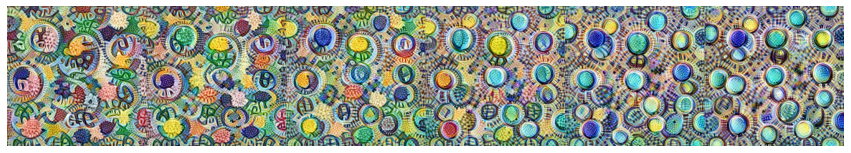

In [3]:
# Interpolating from "artsy" neuron to "gemstones" neuron
image = opt.images.NaturalImage((224, 224), batch=6).to(device)
loss_fn = sum([
    opt.loss.ActivationInterpolation(model.mixed4a, 476, model.mixed4a, 465),
    1e-1 * opt.loss.Alignment(model.mixed4a, 5.0)
])
visualize(model, image, loss_fn)

  0%|          | 0/512 [00:00<?, ? step/s]

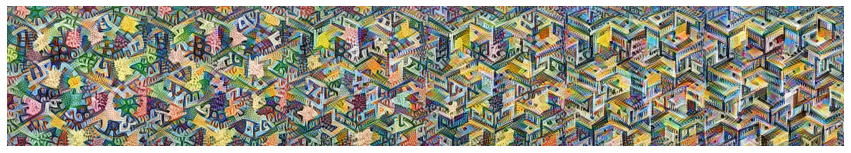

In [4]:
# Interpolating from "artsy" neuron to "buildings" neuron
image = opt.images.NaturalImage((224, 224), batch=6).to(device)
loss_fn = sum([
    opt.loss.ActivationInterpolation(model.mixed4a, 476, model.mixed4a, 455),
    1e-1 * opt.loss.Alignment(model.mixed4a, 5.0)
])
visualize(model, image, loss_fn)

  0%|          | 0/512 [00:00<?, ? step/s]

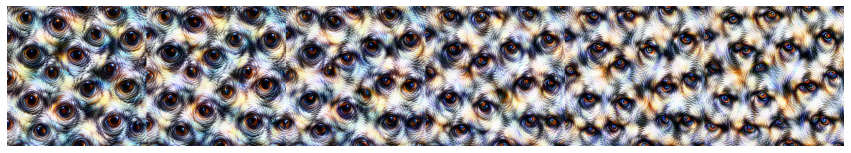

In [5]:
# Interpolating between different eye shapes
image = opt.images.NaturalImage((224, 224), batch=6).to(device)
loss_fn = sum([
    opt.loss.ActivationInterpolation(model.mixed4a, 460, model.mixed4a, 501),
    1e-1 * opt.loss.Alignment(model.mixed4a, 5.0)
])
visualize(model, image, loss_fn)